In [1]:
""" 2023/04/22
    use all train sample to train the pre_autoencoder:
        1. F-norm distance 
        2. CKA keeping 
        3. KNN_overleap
        4. prediction preserving
        #TODO
        Find a Best weigth for this 4 loss function

"""

' 2023/04/22\n    use all train sample to train the pre_autoencoder:\n        1. F-norm distance \n        2. CKA keeping \n        3. KNN_overleap\n        4. prediction preserving\n        #TODO\n        Find a Best weigth for this 4 loss function\n\n'

In [1]:
####### dropout resnet18 vs without dropout
#### 
import torch
import sys
sys.path.append("..")
import numpy as np

CLEAN_PATH = "/home/yifan/dataset/resnet18_with_dropout/pairflip/cifar10/0/"
# REF_PATH = "/home/yifan/dataset/clean/pairflip/cifar10/0"
REF_PATH = "/home/yifan/dataset/resnet18_init/pairflip/cifar10/0"


ENCODER_DIMS=[512,256,256,256,256,2]
DECODER_DIMS= [2,256,256,256,256,512]
VIS_MODEL_NAME = 'vis'

DEVICE='cuda:1'
########## initulize reference data and target data
from AlignVis.DataInit import DataInit
REF_EPOCH = 200
TAR_EPOCH = 200
ref_datainit = DataInit(REF_PATH,REF_PATH,REF_EPOCH,DEVICE)
tar_datainit = DataInit(CLEAN_PATH,CLEAN_PATH,TAR_EPOCH,DEVICE)
ref_model, ref_provider, ref_train_data, ref_prediction, ref_prediction_res, ref_scores = ref_datainit.getData()
tar_model, tar_provider, tar_train_data, tar_prediction, tar_prediction_res, tar_scores = tar_datainit.getData()


from AlignVis.ReferenceGenerator import ReferenceGenerator
gen = ReferenceGenerator(ref_provider=ref_provider, tar_provider=tar_provider,REF_EPOCH=REF_EPOCH,TAR_EPOCH=TAR_EPOCH,ref_model=ref_model,tar_model=tar_model,DEVICE=DEVICE)

absolute_alignment_indicates,predict_label_diff_indicates,predict_confidence_Diff_indicates,high_distance_indicates = gen.subsetClassify(18,0.8,0.3,0.05)


from AlignVisAutoEncoder.trans_visualizer_border import visualizer
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

I = np.eye(512)
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
vis = visualizer(ref_provider, I,I, np.dot(ref_provider.train_representation(TAR_EPOCH),I), projector, 200,[0,1],'tab10')


/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 503.28it/s]


NET resnet18_with_dropout
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8209.00it/s]


absolute alignment indicates number: 167 label diff indicates number: 13 confidence diff indicates number: 15 high distance number: 75


In [2]:
######### initialize autoencoder and dataloader #########################
from AlignVisAutoEncoder.autoencoder import SimpleAutoencoder
from AlignVisAutoEncoder.data_loader import DataLoaderInit
input_dim = 512
output_dim = 512
batch_size = 500

autoencoder = SimpleAutoencoder(input_dim,output_dim)

######### train sample #############
data_loader = DataLoaderInit(ref_provider.train_representation(REF_EPOCH), tar_provider.train_representation(TAR_EPOCH),batch_size)
dataloader = data_loader.get_data_loader()


In [3]:
from AlignVis.autoencoder_generator import AutoEncoderGenerator

AutoEncoder_Generator = AutoEncoderGenerator(REF_PATH, REF_PATH, CLEAN_PATH, CLEAN_PATH, 200,200, projector, DEVICE)

NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8648.41it/s]


NET resnet18_with_dropout
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8019.52it/s]


In [4]:
autoencoder = AutoEncoder_Generator.encoder_trainer("/home/yifan/projects/deepdebugertool/DLVisDebugger/AlignVis_pre_autoencoder_res/new_1.pth",num_epochs=30)

NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8513.24it/s]


NET resnet18_with_dropout
Finish initialization...


100%|██████████| 3/3 [00:00<00:00, 7839.82it/s]


Epoch [1/30], Loss: 219.3745, Loss decoder: 0.0017,Loss encoder: 0.0019,flip_loss: 115.3619613647461,loss_contrastive218.2173762512207


100%|██████████| 3/3 [00:00<00:00, 5506.74it/s]


Epoch [2/30], Loss: 221.4104, Loss decoder: 0.0015,Loss encoder: 0.0017,flip_loss: 107.30746459960938,loss_contrastive220.3341907043457


100%|██████████| 3/3 [00:00<00:00, 6636.56it/s]


Epoch [3/30], Loss: 307.9593, Loss decoder: 0.0014,Loss encoder: 0.0015,flip_loss: 105.46133422851562,loss_contrastive306.90181648254395


100%|██████████| 3/3 [00:00<00:00, 6955.73it/s]


Epoch [4/30], Loss: 276.5954, Loss decoder: 0.0013,Loss encoder: 0.0014,flip_loss: 106.61151885986328,loss_contrastive275.52654092407226


100%|██████████| 3/3 [00:00<00:00, 6831.11it/s]


Epoch [5/30], Loss: 145.9759, Loss decoder: 0.0013,Loss encoder: 0.0014,flip_loss: 105.49270629882812,loss_contrastive144.91828425598143


100%|██████████| 3/3 [00:00<00:00, 7021.71it/s]


Epoch [6/30], Loss: 143.1103, Loss decoder: 0.0013,Loss encoder: 0.0013,flip_loss: 106.66985321044922,loss_contrastive142.04105734252929


100%|██████████| 3/3 [00:00<00:00, 6678.83it/s]


Epoch [7/30], Loss: 206.9381, Loss decoder: 0.0012,Loss encoder: 0.0013,flip_loss: 105.23968505859375,loss_contrastive205.88324560546874


100%|██████████| 3/3 [00:00<00:00, 8377.44it/s]


Epoch [8/30], Loss: 158.1562, Loss decoder: 0.0012,Loss encoder: 0.0012,flip_loss: 104.2853012084961,loss_contrastive157.11099673461914


100%|██████████| 3/3 [00:00<00:00, 7888.97it/s]


Epoch [9/30], Loss: 185.8043, Loss decoder: 0.0011,Loss encoder: 0.0012,flip_loss: 101.94863891601562,loss_contrastive184.782509185791


100%|██████████| 3/3 [00:00<00:00, 6875.91it/s]


Epoch [10/30], Loss: 141.9778, Loss decoder: 0.0011,Loss encoder: 0.0012,flip_loss: 107.9960708618164,loss_contrastive140.89555444335937


100%|██████████| 3/3 [00:00<00:00, 8202.68it/s]


Epoch [11/30], Loss: 131.8114, Loss decoder: 0.0011,Loss encoder: 0.0011,flip_loss: 107.03321838378906,loss_contrastive130.73894844055175


100%|██████████| 3/3 [00:00<00:00, 4873.32it/s]


Epoch [12/30], Loss: 119.3547, Loss decoder: 0.0010,Loss encoder: 0.0011,flip_loss: 104.11720275878906,loss_contrastive118.31146536254883


100%|██████████| 3/3 [00:00<00:00, 6700.17it/s]


Epoch [13/30], Loss: 80.2375, Loss decoder: 0.0009,Loss encoder: 0.0011,flip_loss: 104.37324523925781,loss_contrastive79.19172450256347


100%|██████████| 3/3 [00:00<00:00, 5828.12it/s]


Epoch [14/30], Loss: 90.9010, Loss decoder: 0.0009,Loss encoder: 0.0011,flip_loss: 109.48345947265625,loss_contrastive89.80419737243652


100%|██████████| 3/3 [00:00<00:00, 8399.81it/s]


Epoch [15/30], Loss: 79.8394, Loss decoder: 0.0009,Loss encoder: 0.0011,flip_loss: 109.80638122558594,loss_contrastive78.7394395904541


100%|██████████| 3/3 [00:00<00:00, 6879.67it/s]


Epoch [16/30], Loss: 72.1356, Loss decoder: 0.0008,Loss encoder: 0.0011,flip_loss: 109.11216735839844,loss_contrastive71.04258213806152


100%|██████████| 3/3 [00:00<00:00, 6750.49it/s]


Epoch [17/30], Loss: 145.1733, Loss decoder: 0.0008,Loss encoder: 0.0010,flip_loss: 112.37489318847656,loss_contrastive144.0476446838379


100%|██████████| 3/3 [00:00<00:00, 8009.49it/s]


Epoch [18/30], Loss: 79.8855, Loss decoder: 0.0008,Loss encoder: 0.0010,flip_loss: 110.51360321044922,loss_contrastive78.77856834411621


100%|██████████| 3/3 [00:00<00:00, 6917.49it/s]


Epoch [19/30], Loss: 110.1489, Loss decoder: 0.0008,Loss encoder: 0.0010,flip_loss: 112.45191955566406,loss_contrastive109.02261857604981


100%|██████████| 3/3 [00:00<00:00, 6909.89it/s]


Epoch [20/30], Loss: 80.9745, Loss decoder: 0.0007,Loss encoder: 0.0010,flip_loss: 110.54749298095703,loss_contrastive79.8672588043213


100%|██████████| 3/3 [00:00<00:00, 8360.74it/s]


Epoch [21/30], Loss: 112.4354, Loss decoder: 0.0007,Loss encoder: 0.0010,flip_loss: 107.23812866210938,loss_contrastive111.36130432128907


100%|██████████| 3/3 [00:00<00:00, 8144.28it/s]


Epoch [22/30], Loss: 108.4585, Loss decoder: 0.0007,Loss encoder: 0.0010,flip_loss: 111.33658599853516,loss_contrastive107.34337269592285


100%|██████████| 3/3 [00:00<00:00, 7948.78it/s]


Epoch [23/30], Loss: 136.0345, Loss decoder: 0.0007,Loss encoder: 0.0010,flip_loss: 107.48661041259766,loss_contrastive134.95792100524903


100%|██████████| 3/3 [00:00<00:00, 6845.98it/s]


Epoch [24/30], Loss: 75.9002, Loss decoder: 0.0007,Loss encoder: 0.0010,flip_loss: 106.0421371459961,loss_contrastive74.83812641906738


100%|██████████| 3/3 [00:00<00:00, 6875.91it/s]


Epoch [25/30], Loss: 64.0259, Loss decoder: 0.0007,Loss encoder: 0.0010,flip_loss: 107.99830627441406,loss_contrastive62.944222640991214


100%|██████████| 3/3 [00:00<00:00, 8344.11it/s]


Epoch [26/30], Loss: 102.6964, Loss decoder: 0.0007,Loss encoder: 0.0010,flip_loss: 111.27210998535156,loss_contrastive101.58203581237792


100%|██████████| 3/3 [00:00<00:00, 7290.22it/s]


Epoch [27/30], Loss: 103.0609, Loss decoder: 0.0007,Loss encoder: 0.0010,flip_loss: 109.82752990722656,loss_contrastive101.96099716186524


100%|██████████| 3/3 [00:00<00:00, 8091.90it/s]


Epoch [28/30], Loss: 93.4999, Loss decoder: 0.0007,Loss encoder: 0.0010,flip_loss: 109.73472595214844,loss_contrastive92.40090431213379


100%|██████████| 3/3 [00:00<00:00, 6944.21it/s]


Epoch [29/30], Loss: 104.9906, Loss decoder: 0.0006,Loss encoder: 0.0010,flip_loss: 109.11959838867188,loss_contrastive103.89773503112794


100%|██████████| 3/3 [00:00<00:00, 7534.68it/s]

Epoch [30/30], Loss: 129.7226, Loss decoder: 0.0006,Loss encoder: 0.0010,flip_loss: 108.33509826660156,loss_contrastive128.6376572036743


In [10]:
import torch.optim as optim
import numpy as np
from pyemd import emd
import torch.nn as nn
from scipy.spatial.distance import cdist
from sklearn.neighbors import kneighbors_graph
import torch.nn.functional as F
from AlignVis.AlignSimilarityScaler import AlignSimilarityScaler

AlignSimilarity_scaler = AlignSimilarityScaler(REF_PATH, REF_PATH, CLEAN_PATH, CLEAN_PATH, 200,200, DEVICE)

def earth_movers_distance(X, Y, k=5):
    X, Y = X.detach().numpy(), Y.detach().numpy()
    
    # Compute KNN graphs
    X_knn_graph = kneighbors_graph(X, k, mode='distance')
    Y_knn_graph = kneighbors_graph(Y, k, mode='distance')
    
    # Convert to dense NumPy arrays
    X_knn_matrix = X_knn_graph.toarray()
    Y_knn_matrix = Y_knn_graph.toarray()

    # Calculate the EMD between the KNN distance matrices
    distance_matrix = cdist(X_knn_matrix, Y_knn_matrix)
    first_histogram = np.ones(X_knn_matrix.shape[0]) / X_knn_matrix.shape[0]
    second_histogram = np.ones(Y_knn_matrix.shape[0]) / Y_knn_matrix.shape[0]

    return emd(first_histogram, second_histogram, distance_matrix)

def frobenius_norm_loss(predicted, target):
    return torch.norm(predicted - target, p='fro') / predicted.numel()

def prediction_loss(trans_X, Y):
    
    target_output = tar_provider.get_pred(TAR_EPOCH, Y.detach().numpy())
    # tar_output = self.get_pred(self.TAR_EPOCH, adjusted_input, self.tar_provider.content_path, self.tar_model)
    ref_output = tar_provider.get_pred(TAR_EPOCH, trans_X.detach().numpy())
    loss_ref_output = F.mse_loss(torch.tensor(ref_output), torch.tensor(target_output))
    loss_Rep = F.mse_loss(trans_X, Y)
        
    # loss = loss_tar_output + loss_Rep + self.alpha_for_pred_ref * loss_ref_output
    loss =  loss_Rep + 1 * loss_ref_output
    return loss

# Define a contrastive loss function
def contrastive_loss(x1, x2, y, margin=1.0):
    y = torch.from_numpy(labels)
    # Compute the Euclidean distance between x1 and x2
    distance = F.pairwise_distance(x1, x2)

    # Compute the contrastive loss
    loss_contrastive = torch.mean(y * torch.pow(distance, 2) + (1 - y) * torch.pow(torch.clamp(margin - distance, min=0.0), 2))

    return loss_contrastive


def label_flip_loss(X, Y, encoded_Y):
    
    pred = ref_provider.get_pred(REF_EPOCH, X.detach().numpy()).argmax(axis=1)
    new_pred_origin = tar_provider.get_pred(REF_EPOCH, Y.detach().numpy())
    new_pred = new_pred_origin.argmax(axis=1)
    flip_indices = [i for i, (x, y) in enumerate(zip(pred, new_pred)) if x != y]

    embedding_ref = projector.batch_project(REF_EPOCH, X.detach().numpy())
    embedding_trans = projector.batch_project(REF_EPOCH, encoded_Y.detach().numpy())
    inv_ref_data = projector.batch_inverse(REF_EPOCH, embedding_ref)
    inv_trans_data = projector.batch_inverse(REF_EPOCH, embedding_trans)

    low_pred = ref_provider.get_pred(REF_EPOCH, inv_ref_data).argmax(axis=1)
    low_new_pred_origin = tar_provider.get_pred(REF_EPOCH, inv_trans_data)
    low_new_pred = low_new_pred_origin.argmax(axis=1)

    low_flip_indices = [i for i, (x, y) in enumerate(zip(low_pred, low_new_pred)) if x != y]
    loss_intersection = set(flip_indices).intersection(low_flip_indices)

    loss_ppr = F.mse_loss(torch.tensor(new_pred_origin), torch.tensor(low_new_pred_origin))

    inv_trans_data_tensor = torch.tensor(inv_trans_data)
    recon_loss = F.mse_loss(inv_trans_data_tensor, Y)
        
    # Compute the edge loss
    edge_mask = (torch.tensor(pred) == torch.tensor(new_pred)).float()  # create a mask indicating which indices share the same label
    edge_mask = edge_mask.unsqueeze(-1)
    edge_loss = ((inv_trans_data_tensor - Y)**2 * edge_mask).sum() / edge_mask.sum()  # mean squared error of values at edge indices

    if len(flip_indices) == 0:
        flip_loss = 0.001
    else:
        flip_loss = len(loss_intersection) / len(flip_indices)
      
    loss = 0.1 * flip_loss + 0.2 * loss_ppr + 0.35 * recon_loss + 0.35 * edge_loss
    # loss =  abs(diff_pred - diff_low_pred)
    return loss

# Define hyperparameters
num_epochs = 20

learning_rate = 1e-5

# Define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=learning_rate,weight_decay=1e-5)

alpha = 1 # weight for topological loss, adjust this according to your requirements


# Training loop
for epoch in range(num_epochs):
    # Initialize a list to store the predictions of unlabelled data
    unlabelled_preds = []
    # encoded_Y = autoencoder.encoder(Y)
    # flip_loss = label_flip_loss(X, Y, encoded_Y)
    for data_X, data_Y in dataloader: # Assuming you have a DataLoader instance with paired data (X, Y)
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass (encoding Y and decoding to X's space)
        transformed_Y = autoencoder.encoder(data_Y)
        recon_X = autoencoder.decoder(transformed_Y)

        topological_loss_encoder = earth_movers_distance(data_Y, transformed_Y)
        topological_loss_decoder = earth_movers_distance(data_Y, recon_X)
        
        loss_f_decoder = frobenius_norm_loss(recon_X, data_Y) + 10* topological_loss_decoder
        loss_f_encoder = frobenius_norm_loss(transformed_Y, data_X) + topological_loss_encoder
        
        ###### get current similairrty
        sim_list = AlignSimilarity_scaler.get_jaccard_similarities(data_X, data_Y,10)

        # Create a binary label tensor indicating whether each pair is similar or dissimilar
        sim_array = np.array(sim_list)
        # print(sim_array)
        labels = (sim_array > 0.99).astype(float)
        # print(labels)

        loss_contrastive = contrastive_loss(data_X, transformed_Y, labels)

        # pred_loss = prediction_loss(recon_X, data_Y)

        flip_loss = label_flip_loss(data_X, data_Y, recon_X)

        # loss = loss_f_decoder + loss_f_encoder + 0.01 * pred_loss + 0.1 * flip_loss
        
        loss = loss_f_decoder + loss_f_encoder + 0.01 * flip_loss + loss_contrastive
        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()


    # Print the loss for each epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Loss decoder: {loss_f_decoder.item():.4f},Loss encoder: {loss_f_encoder.item():.4f},flip_loss: {flip_loss},loss_contrastive{loss_contrastive}')

torch.save({
    'epoch': TAR_EPOCH,
    'model_state_dict': autoencoder.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': loss
}, "/home/yifan/projects/deepdebugertool/DLVisDebugger/AlignVis_pre_autoencoder_res/loss_contrastive_ref_init.pth")


NET resnet18
Finish initialization...


100%|██████████| 250/250 [00:00<00:00, 8455.51it/s]


NET resnet18_with_dropout
Finish initialization...


100%|██████████| 3/3 [00:00<00:00, 7423.55it/s]


Epoch [1/20], Loss: 301.1261, Loss decoder: 0.0017,Loss encoder: 0.0018,flip_loss: 116.54554748535156,loss_contrastive299.9571680297852


100%|██████████| 3/3 [00:00<00:00, 7354.13it/s]


Epoch [2/20], Loss: 261.7211, Loss decoder: 0.0015,Loss encoder: 0.0016,flip_loss: 111.99261474609375,loss_contrastive260.59803009033203


100%|██████████| 3/3 [00:00<00:00, 6282.03it/s]


Epoch [3/20], Loss: 198.1917, Loss decoder: 0.0013,Loss encoder: 0.0015,flip_loss: 104.92190551757812,loss_contrastive197.13963989257812


100%|██████████| 3/3 [00:00<00:00, 6288.31it/s]


Epoch [4/20], Loss: 159.2032, Loss decoder: 0.0013,Loss encoder: 0.0014,flip_loss: 104.39491271972656,loss_contrastive158.15650434875488


100%|██████████| 3/3 [00:00<00:00, 7239.88it/s]


Epoch [5/20], Loss: 172.4527, Loss decoder: 0.0013,Loss encoder: 0.0014,flip_loss: 106.6955795288086,loss_contrastive171.38313348388672


100%|██████████| 3/3 [00:00<00:00, 5703.95it/s]


Epoch [6/20], Loss: 219.3677, Loss decoder: 0.0012,Loss encoder: 0.0013,flip_loss: 103.6840591430664,loss_contrastive218.32831401062012


100%|██████████| 3/3 [00:00<00:00, 5377.31it/s]


Epoch [7/20], Loss: 164.3147, Loss decoder: 0.0012,Loss encoder: 0.0013,flip_loss: 105.71533203125,loss_contrastive163.25511122131348


100%|██████████| 3/3 [00:00<00:00, 7281.78it/s]


Epoch [8/20], Loss: 132.5121, Loss decoder: 0.0012,Loss encoder: 0.0012,flip_loss: 104.6082534790039,loss_contrastive131.46359480285645


100%|██████████| 3/3 [00:00<00:00, 6093.42it/s]


Epoch [9/20], Loss: 145.7594, Loss decoder: 0.0011,Loss encoder: 0.0012,flip_loss: 106.09368896484375,loss_contrastive144.69613360595704


100%|██████████| 3/3 [00:00<00:00, 6123.07it/s]


Epoch [10/20], Loss: 80.6328, Loss decoder: 0.0011,Loss encoder: 0.0011,flip_loss: 106.38121032714844,loss_contrastive79.56679426574706


100%|██████████| 3/3 [00:00<00:00, 7165.67it/s]


Epoch [11/20], Loss: 132.1011, Loss decoder: 0.0010,Loss encoder: 0.0011,flip_loss: 106.64122009277344,loss_contrastive131.03251045227051


100%|██████████| 3/3 [00:00<00:00, 6432.98it/s]


Epoch [12/20], Loss: 127.1044, Loss decoder: 0.0010,Loss encoder: 0.0011,flip_loss: 104.29541778564453,loss_contrastive126.05938442993164


100%|██████████| 3/3 [00:00<00:00, 6069.90it/s]


Epoch [13/20], Loss: 120.6802, Loss decoder: 0.0009,Loss encoder: 0.0011,flip_loss: 106.93531036376953,loss_contrastive119.60885960388184


100%|██████████| 3/3 [00:00<00:00, 7227.40it/s]


Epoch [14/20], Loss: 85.0372, Loss decoder: 0.0009,Loss encoder: 0.0011,flip_loss: 110.61919403076172,loss_contrastive83.92905746459961


100%|██████████| 3/3 [00:00<00:00, 6397.01it/s]


Epoch [15/20], Loss: 91.8654, Loss decoder: 0.0009,Loss encoder: 0.0010,flip_loss: 108.65363311767578,loss_contrastive90.77691775512696


100%|██████████| 3/3 [00:00<00:00, 5407.35it/s]


Epoch [16/20], Loss: 85.2454, Loss decoder: 0.0008,Loss encoder: 0.0010,flip_loss: 105.8380126953125,loss_contrastive84.18519866943359


100%|██████████| 3/3 [00:00<00:00, 6126.05it/s]


Epoch [17/20], Loss: 111.4800, Loss decoder: 0.0008,Loss encoder: 0.0010,flip_loss: 107.01618957519531,loss_contrastive110.40806308746338


100%|██████████| 3/3 [00:00<00:00, 6213.78it/s]


Epoch [18/20], Loss: 112.0929, Loss decoder: 0.0008,Loss encoder: 0.0010,flip_loss: 107.39778137207031,loss_contrastive111.01711981201171


100%|██████████| 3/3 [00:00<00:00, 6883.43it/s]


Epoch [19/20], Loss: 136.1028, Loss decoder: 0.0007,Loss encoder: 0.0010,flip_loss: 108.44426727294922,loss_contrastive135.01664895629884


100%|██████████| 3/3 [00:00<00:00, 6291.46it/s]

Epoch [20/20], Loss: 134.4666, Loss decoder: 0.0007,Loss encoder: 0.0010,flip_loss: 105.29039001464844,loss_contrastive133.4119931335449


In [13]:
sim_list_all = AlignSimilarity_scaler.get_jaccard_similarities(ref_train_data, tar_train_data, 10)

In [7]:
indices = [i for i, score in enumerate(sim_list_all) if score >0.998]
len(indices)

9987

In [30]:
diff_indices = [i for i, score in enumerate(sim_list_all) if score < 0.3]
len(diff_indices)

123

123

In [10]:
ref_2d = projector.batch_project(200,ref_provider.train_representation(200))

In [52]:
def normalize_distances(distances):
    d_max = torch.max(distances)
    return distances / d_max

def weighted_harmonic_mean(jaccard_similarities, normalized_distances, alpha=0.5):
    numerator = (1 + alpha) * jaccard_similarities * (1 - normalized_distances)
    denominator = alpha * (1 - normalized_distances) + jaccard_similarities
    return numerator / denominator

def evaluate_alignment_preserving(subset_distances, subset_jaccard_similarities, alpha=0.5):
    normalized_distances = normalize_distances(subset_distances)
    harmonic_means = weighted_harmonic_mean(subset_jaccard_similarities, normalized_distances, alpha)
    return torch.mean(harmonic_means)

In [60]:
eval_score_init = evaluate_alignment_preserving(torch.Tensor(distances), torch.Tensor(sim_list_all))

In [61]:
eval_score = evaluate_alignment_preserving(torch.Tensor(distances2), torch.Tensor(sim_list_all))

In [62]:
print(eval_score_init, eval_score)

tensor(0.5905) tensor(0.6252)


In [14]:
# checkpoint = torch.load("/home/yifan/projects/deepdebugertool/DLVisDebugger/AlignVis_pre_autoencoder_res/loss_contrastive.pth")
# autoencoder.load_state_dict(checkpoint['model_state_dict'])
Y = torch.Tensor(tar_provider.train_representation(TAR_EPOCH))
encoded_Y = autoencoder.encoder(Y)
tar_2d = projector.batch_project(200, encoded_Y.detach().numpy())

In [17]:
# absolute_alignment_indicates,predict_label_diff_indicates
distances_1 = pairwise_distances(ref_train_data[absolute_alignment_indicates], encoded_Y.detach().numpy()[absolute_alignment_indicates])
print(distances_1.mean())

20.849564


In [18]:
from sklearn.metrics import pairwise_distances
distances2 = pairwise_distances(ref_train_data, encoded_Y.detach().numpy())
print(len(ref_train_data),"all data samples distance" ,distances2.mean())

50000 all data samples distance 20.444546


In [26]:
indices = [i for i, score in enumerate(sim_list_all) if score >0.997]
len(indices)

19973

In [27]:
indices = [i for i, score in enumerate(sim_list_all) if score >0.997]
len(indices)
distances_1 = pairwise_distances(ref_train_data[indices], encoded_Y.detach().numpy()[indices])
print(len(indices),"align samples distance" ,distances_1.mean())

19973 align samples distance 19.771412


In [28]:
indices = [i for i, score in enumerate(sim_list_all) if score >0.9975]
len(indices)
distances_2 = pairwise_distances(ref_train_data[indices], encoded_Y.detach().numpy()[indices])
print(len(indices),"align samples distance" ,distances_2.mean())

14977 align samples distance 19.540493


4995 align samples distance 13.647605


In [33]:
distances_2 = pairwise_distances(ref_train_data[indices], encoded_Y.detach().numpy()[indices])
print(distances_2.mean())

13.647605


In [31]:
distances_1 = pairwise_distances(ref_train_data[diff_indices], encoded_Y.detach().numpy()[diff_indices])
print(distances_1.mean())

15.260097


In [19]:
checkpoint = torch.load("/home/yifan/projects/deepdebugertool/DLVisDebugger/AlignVis_pre_autoencoder_res/loss_contrastive.pth")
autoencoder.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [27]:
###### use auto encoder to visualize the prediction
X = torch.Tensor(ref_provider.train_representation(REF_EPOCH))
Y = torch.Tensor(tar_provider.train_representation(TAR_EPOCH))
# Transform X into Y's space
encoded_X = autoencoder.decoder(X)

# Transform Y into X's space
encoded_Y = autoencoder.encoder(Y)
c_y = encoded_Y.detach().numpy()

from CKA_utils.CKA import CKA, CudaCKA
np_cka = CKA()
# indicates = np.random.choice(aligned, size=10, replace=False)
indicates = np.random.choice(np.arange(50000), size=1000, replace=False)
print('CKA between  target vs target is:         ',np_cka.kernel_CKA(Y[indicates],Y[indicates]))
print('CKA between target and autoencoder_target:',np_cka.kernel_CKA(Y[indicates],c_y[indicates]))
print('CKA between  ref vs autoencoder_target is:',np_cka.kernel_CKA(X[indicates],c_y[indicates]))
print('CKA between  ref vs target is:            ',np_cka.kernel_CKA(X[indicates],c_y[indicates]))

CKA between  target vs target is:          1.0
CKA between target and autoencoder_target: 0.9997129790053825
CKA between  ref vs autoencoder_target is: 0.8225508818534719
CKA between  ref vs target is:             0.8225508818534719


In [40]:
from AlignVis_eval.AlignEval import Evaluator
eval = Evaluator(projector,ref_provider,tar_provider,REF_EPOCH,TAR_EPOCH)

eval.eval_nn_train_ref_in_ref(15) #1.22


Fri May  5 18:35:50 2023 Building RP forest with 16 trees
Fri May  5 18:35:51 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Fri May  5 18:35:53 2023 Building RP forest with 16 trees
Fri May  5 18:35:53 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
#train# nn preserving ref in ref: 1.23/15 in epoch 200


1.23434

In [30]:
eval.eval_nn_train_autoencoder(15, autoencoder )

Fri May  5 18:25:52 2023 Building RP forest with 16 trees
Fri May  5 18:25:52 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Fri May  5 18:25:54 2023 Building RP forest with 16 trees
Fri May  5 18:25:54 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
#train# nn preserving for autoencoder: 1.33/15 in epoch 200


1.33438

In [34]:
eval.eval_ppr_autoencoder(autoencoder)

100%|██████████| 250/250 [00:00<00:00, 7764.01it/s]

#train# autoencoder PPR: 0.96 in epoch 200


0.96474

In [41]:
eval.eval_ppr_ref_in_ref()

100%|██████████| 250/250 [00:00<00:00, 8328.05it/s]

#train# ref in ref PPR: 0.95 in epoch 200


0.94616

Computing decision regions ...


100%|██████████| 200/200 [00:00<00:00, 8616.78it/s]
../AlignVisAutoEncoder/visualizer.py:191: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  train_data = self.data_provider.train_representation(epoch)[self.indicates]
../AlignVisAutoEncoder/visualizer.py:192: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  train_labels = self.data_provider.train_labels(epoch)[self.indicates]
../AlignVisAutoEncoder/visualizer.py:193: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq

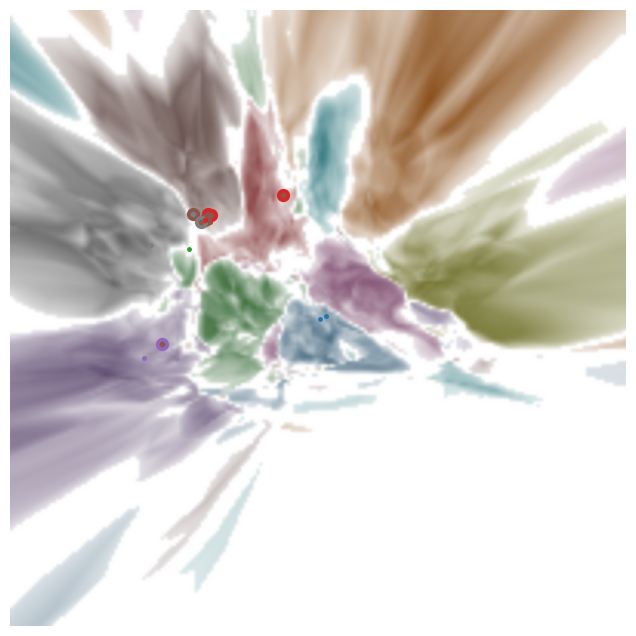

In [31]:
##### visuallize all data
import os
from singleVis.SingleVisualizationModel import VisModel
from singleVis.projector import TimeVisProjector
model = VisModel(ENCODER_DIMS, DECODER_DIMS)
VIS_MODEL_NAME = 'vis'
projector = TimeVisProjector(vis_model=model, content_path=REF_PATH, vis_model_name=VIS_MODEL_NAME, device="cpu")
Y = torch.Tensor(tar_provider.train_representation(TAR_EPOCH))
encoded_Y = autoencoder.encoder(Y)
I = np.eye(512)
from AlignVisAutoEncoder.visualizer import visualizer
# from representationTrans.visualizer import visualizer
vis = visualizer(tar_provider, ref_provider, autoencoder, np.dot(encoded_Y.detach().numpy(), I), projector, 200,[predict_label_diff_indicates],'tab10')
save_dir = os.path.join('/home/yifan/projects' , "imgcontrast")
# os.makedirs(save_dir)

vis.savefig(REF_EPOCH, path=os.path.join("/home/yifan/projects/deepdebugertool/DLVisDebugger/img2.png"))

In [49]:
from AlignVis_eval.Alignmenteval import Evaluator
eval = Evaluator(projector,ref_provider,tar_provider,REF_EPOCH,TAR_EPOCH)

In [51]:
eval.eval_nn_train_autoencoder(15, autoencoder )

Thu May  4 13:45:43 2023 Building RP forest with 16 trees
Thu May  4 13:45:43 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Thu May  4 13:45:56 2023 Building RP forest with 16 trees
Thu May  4 13:45:57 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
#train# nn preserving for autoencoder: 1.37/15 in epoch 200


1.37114